<a href="https://colab.research.google.com/github/Jo-CC/ImageProcessing/blob/main/MV2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Import libraries and packages needed

Upload all the image in Images folder here

In [ ]:
!sudo apt-get install tesseract-ocr

In [ ]:
!pip install pytesseract==0.3.9

In [ ]:
!pip install easyocr

In [ ]:
 # import the necessary packages
from matplotlib import pyplot as plt
import cv2
#import pytesseract
import numpy as np
import csv
import argparse
import imutils
import glob
import os
#import easyocr

#Report 2

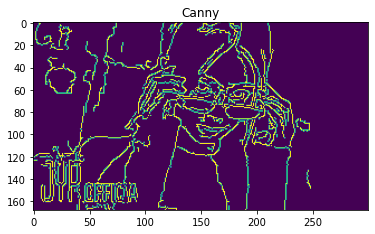

In [ ]:
#@title Report 2: Image Filtering

Img_Path = '/content/images.jfif' #@param{type:"string"}
Filter_type = "Canny" #@param ["Low Pass", "High Pass", "Canny"] {allow-input: true}
Blur_Intensity = 5 #@param {type:"slider", min:3, max:100, step:2}
LowPass_Filter = "All" #@param ["Median Blur", "Averaging Blur", "Gaussian Blur", "All"] {allow-input: true}
HighPass_Filter = "All" #@param ["Sharpen", "Gaussian HP", "Average HP", "Laplacian", "Sobel X", "Sobel Y", "All"] {allow-input: true}

Img_Input = cv2.imread(Img_Path)
imgclr = cv2.cvtColor(Img_Input, cv2.COLOR_BGR2RGB)
#plt.imshow(imgclr)
#plt.title("Original Image")
#plt.show()
if Filter_type == "Low Pass":
  ImgTitle = LowPass_Filter
  #________________ LOW PASS FILTER ________________#
  if LowPass_Filter == "Median Blur":
    Filtered_Img = cv2.medianBlur(Img_Input,Blur_Intensity)
  elif LowPass_Filter == "Averaging Blur":
    Filtered_Img = cv2.blur(Img_Input,(Blur_Intensity,Blur_Intensity))
  elif LowPass_Filter == "Gaussian Blur":
    Filtered_Img = cv2.GaussianBlur(Img_Input,(Blur_Intensity,Blur_Intensity),0)
  elif LowPass_Filter == "All":
    f1, axarr1 = plt.subplots(2, 2, figsize=(30, 15))
    GB_Img = cv2.GaussianBlur(imgclr,(Blur_Intensity,Blur_Intensity),0)
    AB_Img = cv2.medianBlur(imgclr,Blur_Intensity)
    MB_Img = cv2.medianBlur(imgclr,Blur_Intensity)
    axarr1[0][0].imshow(imgclr)
    axarr1[0][0].set_title("Original", fontsize = 20)
    axarr1[0][1].imshow(GB_Img)
    axarr1[0][1].set_title("Gaussian Blur", fontsize = 20)
    axarr1[1][0].imshow(MB_Img)
    axarr1[1][0].set_title("Median Blur", fontsize = 20)
    axarr1[1][1].imshow(AB_Img)
    axarr1[1][1].set_title("Box Blur", fontsize = 20)

#________________ HIGH PASS FILTER ________________#
elif Filter_type == "High Pass":
    ImgTitle = HighPass_Filter
    gray = cv2.cvtColor(imgclr, cv2.COLOR_RGB2GRAY)
    kernel = np.array([[-1, -1, -1],[-1, 9, -1],[-1, -1, -1]])
    if HighPass_Filter == "Sharpen":
      Filtered_Img = cv2.filter2D(src=imgclr, ddepth=-1, kernel=kernel)
    elif HighPass_Filter == "Gaussian HP":
      Filtered_Img = Img_Input - cv2.GaussianBlur(Img_Input,(Blur_Intensity,Blur_Intensity),3)+127
    elif  HighPass_Filter == "Average HP":
      Filtered_Img = Img_Input - cv2.blur(Img_Input,(Blur_Intensity,Blur_Intensity))+127
    elif  HighPass_Filter == "Laplacian":
      Filtered_Img = cv2.Laplacian(gray, cv2.CV_64F)
    elif  HighPass_Filter == "Sobel X":
      Filtered_Img = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=Blur_Intensity)
    elif  HighPass_Filter == "Sobel Y":
      Filtered_Img = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=Blur_Intensity)
    elif LowPass_Filter == "All":
      f2, axarr2 = plt.subplots(3, 2, figsize=(30, 30))
      G_Hp = Img_Input - cv2.GaussianBlur(Img_Input,(Blur_Intensity,Blur_Intensity),3)+127
      A_Hp = Img_Input - cv2.blur(Img_Input,(Blur_Intensity,Blur_Intensity))+127
      Lap_filter = cv2.Laplacian(gray, cv2.CV_64F)
      Sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=Blur_Intensity)
      Sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=Blur_Intensity)
      axarr2[0][0].imshow(imgclr)
      axarr2[0][0].set_title("Original", fontsize = 25)
      axarr2[0][1].imshow(G_Hp)
      axarr2[0][1].set_title("Gaussian High Pass", fontsize = 25)
      axarr2[1][0].imshow(A_Hp)
      axarr2[1][0].set_title("Average High Pass", fontsize = 25)
      axarr2[1][1].imshow(Lap_filter)
      axarr2[1][1].set_title("Laplacian", fontsize = 25)
      axarr2[2][0].imshow(Sobel_x)
      axarr2[2][0].set_title("Sobel X", fontsize = 25)
      axarr2[2][1].imshow(Sobel_y)
      axarr2[2][1].set_title("Sobel Y", fontsize = 25)

#________________ CANNY ________________#

elif  Filter_type == "Canny":
      Filtered_Img = cv2.Canny(Img_Input, 50, 200)
      ImgTitle = Filter_type

if Filter_type == "High Pass" or Filter_type == "Low Pass":
  if HighPass_Filter == "All" or LowPass_Filter == "All":
    a = 1
  else:
    plt.imshow(Filtered_Img)
    plt.title(ImgTitle)
    plt.show()
else:
  plt.imshow(Filtered_Img)
  plt.title(ImgTitle)
  plt.show()


K: 2


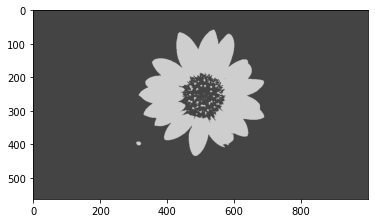

In [ ]:
#@title Report 2: Image Segmentation

img_pathh = "/content/gray2.jfif" #@param {type:"string"}
seg_Method = "K-Mean" #@param ["Contour Tracing", "Thresholding", "K-Mean", "CCL"] {allow-input: true}

img = cv2.imread(img_pathh) #insert image path
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(gray2, cv2.COLOR_RGB2GRAY)
b,g,r = cv2.split(img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
# Threshold image
if seg_Method == "Thresholding":
  ret,global_Thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)

  otsu_Thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

  adaptive_Thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,11,2)

  f3, axarr3 = plt.subplots(2, 2, figsize=(30, 15))
  axarr3[0][0].imshow(rgb_img)
  axarr3[0][0].set_title("Original", fontsize = 20)
  axarr3[0][1].imshow(global_Thresh)
  axarr3[0][1].set_title("Global", fontsize = 20)
  axarr3[1][0].imshow(otsu_Thresh)
  axarr3[1][0].set_title("Otsu", fontsize = 20)
  axarr3[1][1].imshow(adaptive_Thresh)
  axarr3[1][1].set_title("Adaptive", fontsize = 20)

elif seg_Method == "Contour Tracing":
  otsu_Thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(otsu_Thresh.shape[0]/30), 
                                                         int(otsu_Thresh.shape[1]/30)))
  rect_kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
  dilation = cv2.dilate(otsu_Thresh, rect_kernel, iterations = 1)
  opening = cv2.erode(dilation, rect_kernel, iterations = 1)
  contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(rgb_img, contours, -1, (0, 255, 0), 10)
  plt.imshow(rgb_img)

elif seg_Method == "CCL":
  otsu_Thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  rect_kernel =cv2.getStructuringElement(cv2.MORPH_RECT, (int(otsu_Thresh.shape[0]/30), 
                                                         int(otsu_Thresh.shape[1]/30)))
  dilation = cv2.dilate(otsu_Thresh,rect_kernel,iterations=1)
  opening = cv2.erode(dilation, rect_kernel, iterations = 1)
  analysis = cv2.connectedComponentsWithStats(opening,4, cv2.CV_32S) 
  (totalLabels, label_ids, values, centroid) = analysis
  
# Initialize a new image to
# store all the output components
  output = np.zeros(gray.shape, dtype="uint8")
  for i in range(1, totalLabels):
    
      # Area of the component
    area = values[i, cv2.CC_STAT_AREA] 
    componentMask = (label_ids == i).astype("uint8") * 255
    output = cv2.bitwise_or(output, componentMask)
  
  plt.imshow(output)

elif seg_Method == "K-Mean":
  K = input("K: ")
  Z = rgb_img.reshape((-1,3))
  # convert to np.float32
  Z = np.float32(Z)
  # define criteria, number of clusters(K) and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  
  ret,label,center=cv2.kmeans(Z,int(K),None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((img.shape))
  plt.imshow(res2)

2All in one run

K: 3


Text(0.5, 1.0, 'K-Mean with K = 3')

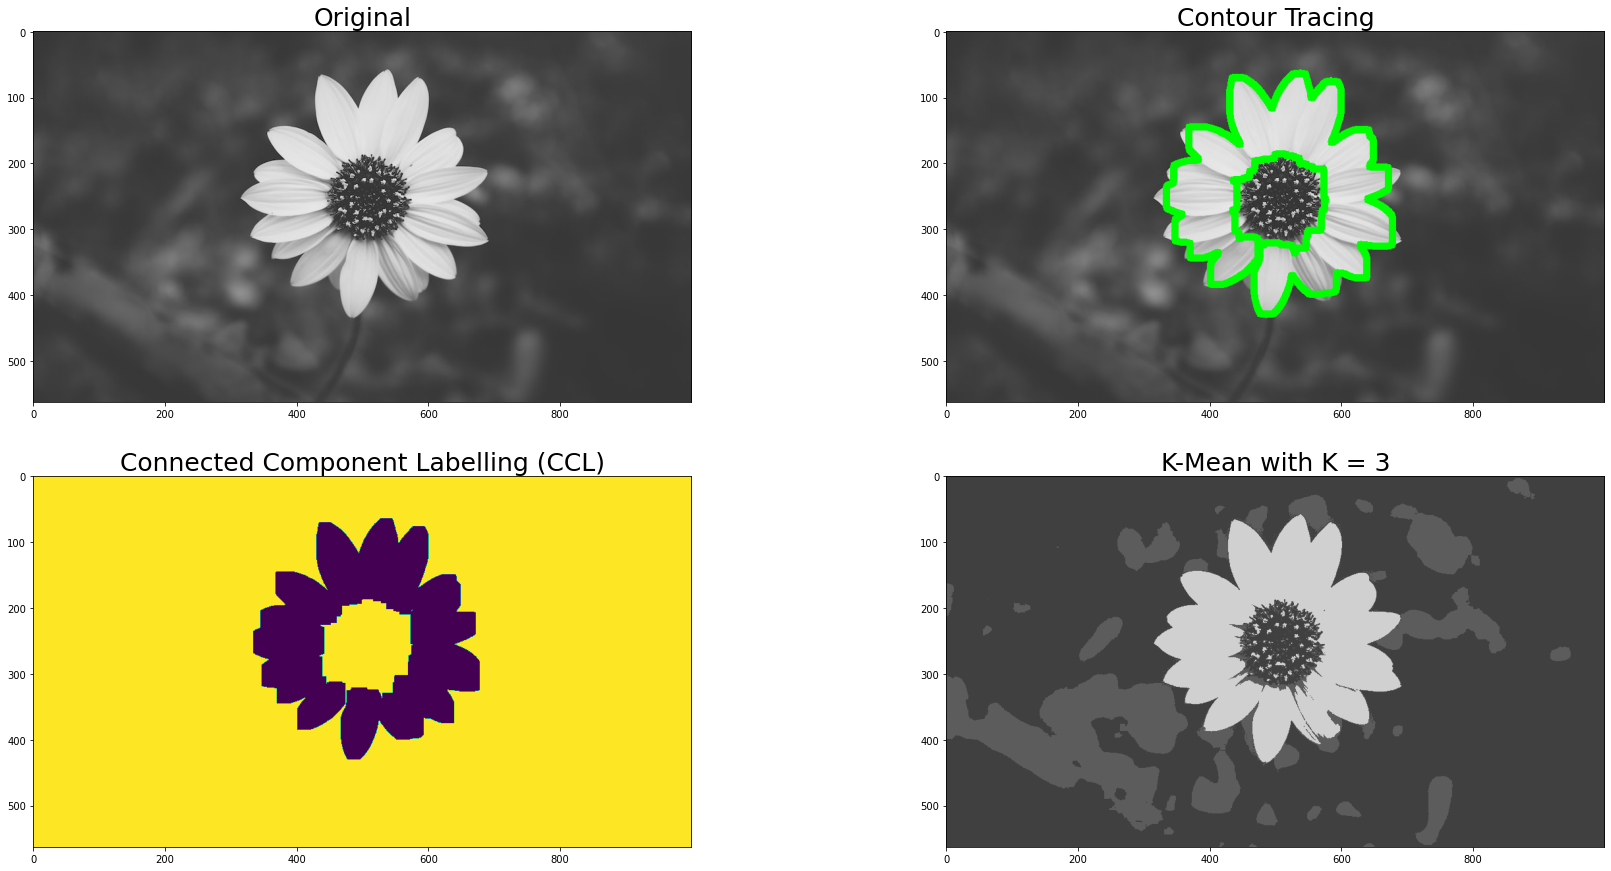

In [ ]:
otsu_Thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(otsu_Thresh.shape[0]/30), 
                                                        int(otsu_Thresh.shape[1]/30)))
rect_kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
dilation = cv2.dilate(otsu_Thresh, rect_kernel, iterations = 1)
opening = cv2.erode(dilation, rect_kernel, iterations = 1)

thresh_inverse = cv2.bitwise_not(opening)

contours, hierarchy = cv2.findContours(thresh_inverse, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(rgb_img, contours, -1, (0, 255, 0), 10)

analysis = cv2.connectedComponentsWithStats(opening,4, cv2.CV_32S) 
(totalLabels, label_ids, values, centroid) = analysis

# Initialize a new image to
# store all the output components
output = np.zeros(gray.shape, dtype="uint8")
for i in range(1, totalLabels):
  
    # Area of the component
  area = values[i, cv2.CC_STAT_AREA] 
  componentMask = (label_ids == i).astype("uint8") * 255
  output = cv2.bitwise_or(output, componentMask)

K = input("K: ")
Z = gray2.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret,label,center=cv2.kmeans(Z,int(K),None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

f3, axarr3 = plt.subplots(2, 2, figsize=(30, 15))
axarr3[0][0].imshow(gray2)
axarr3[0][0].set_title("Original", fontsize = 25)
axarr3[0][1].imshow(rgb_img)
axarr3[0][1].set_title("Contour Tracing", fontsize = 25)
axarr3[1][0].imshow(output)
axarr3[1][0].set_title("Connected Component Labelling (CCL)", fontsize = 25)
axarr3[1][1].imshow(res2)
axarr3[1][1].set_title("K-Mean with K = "+K, fontsize = 25)

# Report 3 – Object Detection and Recognition using Blob and Pattern Matching

### Object Recognition

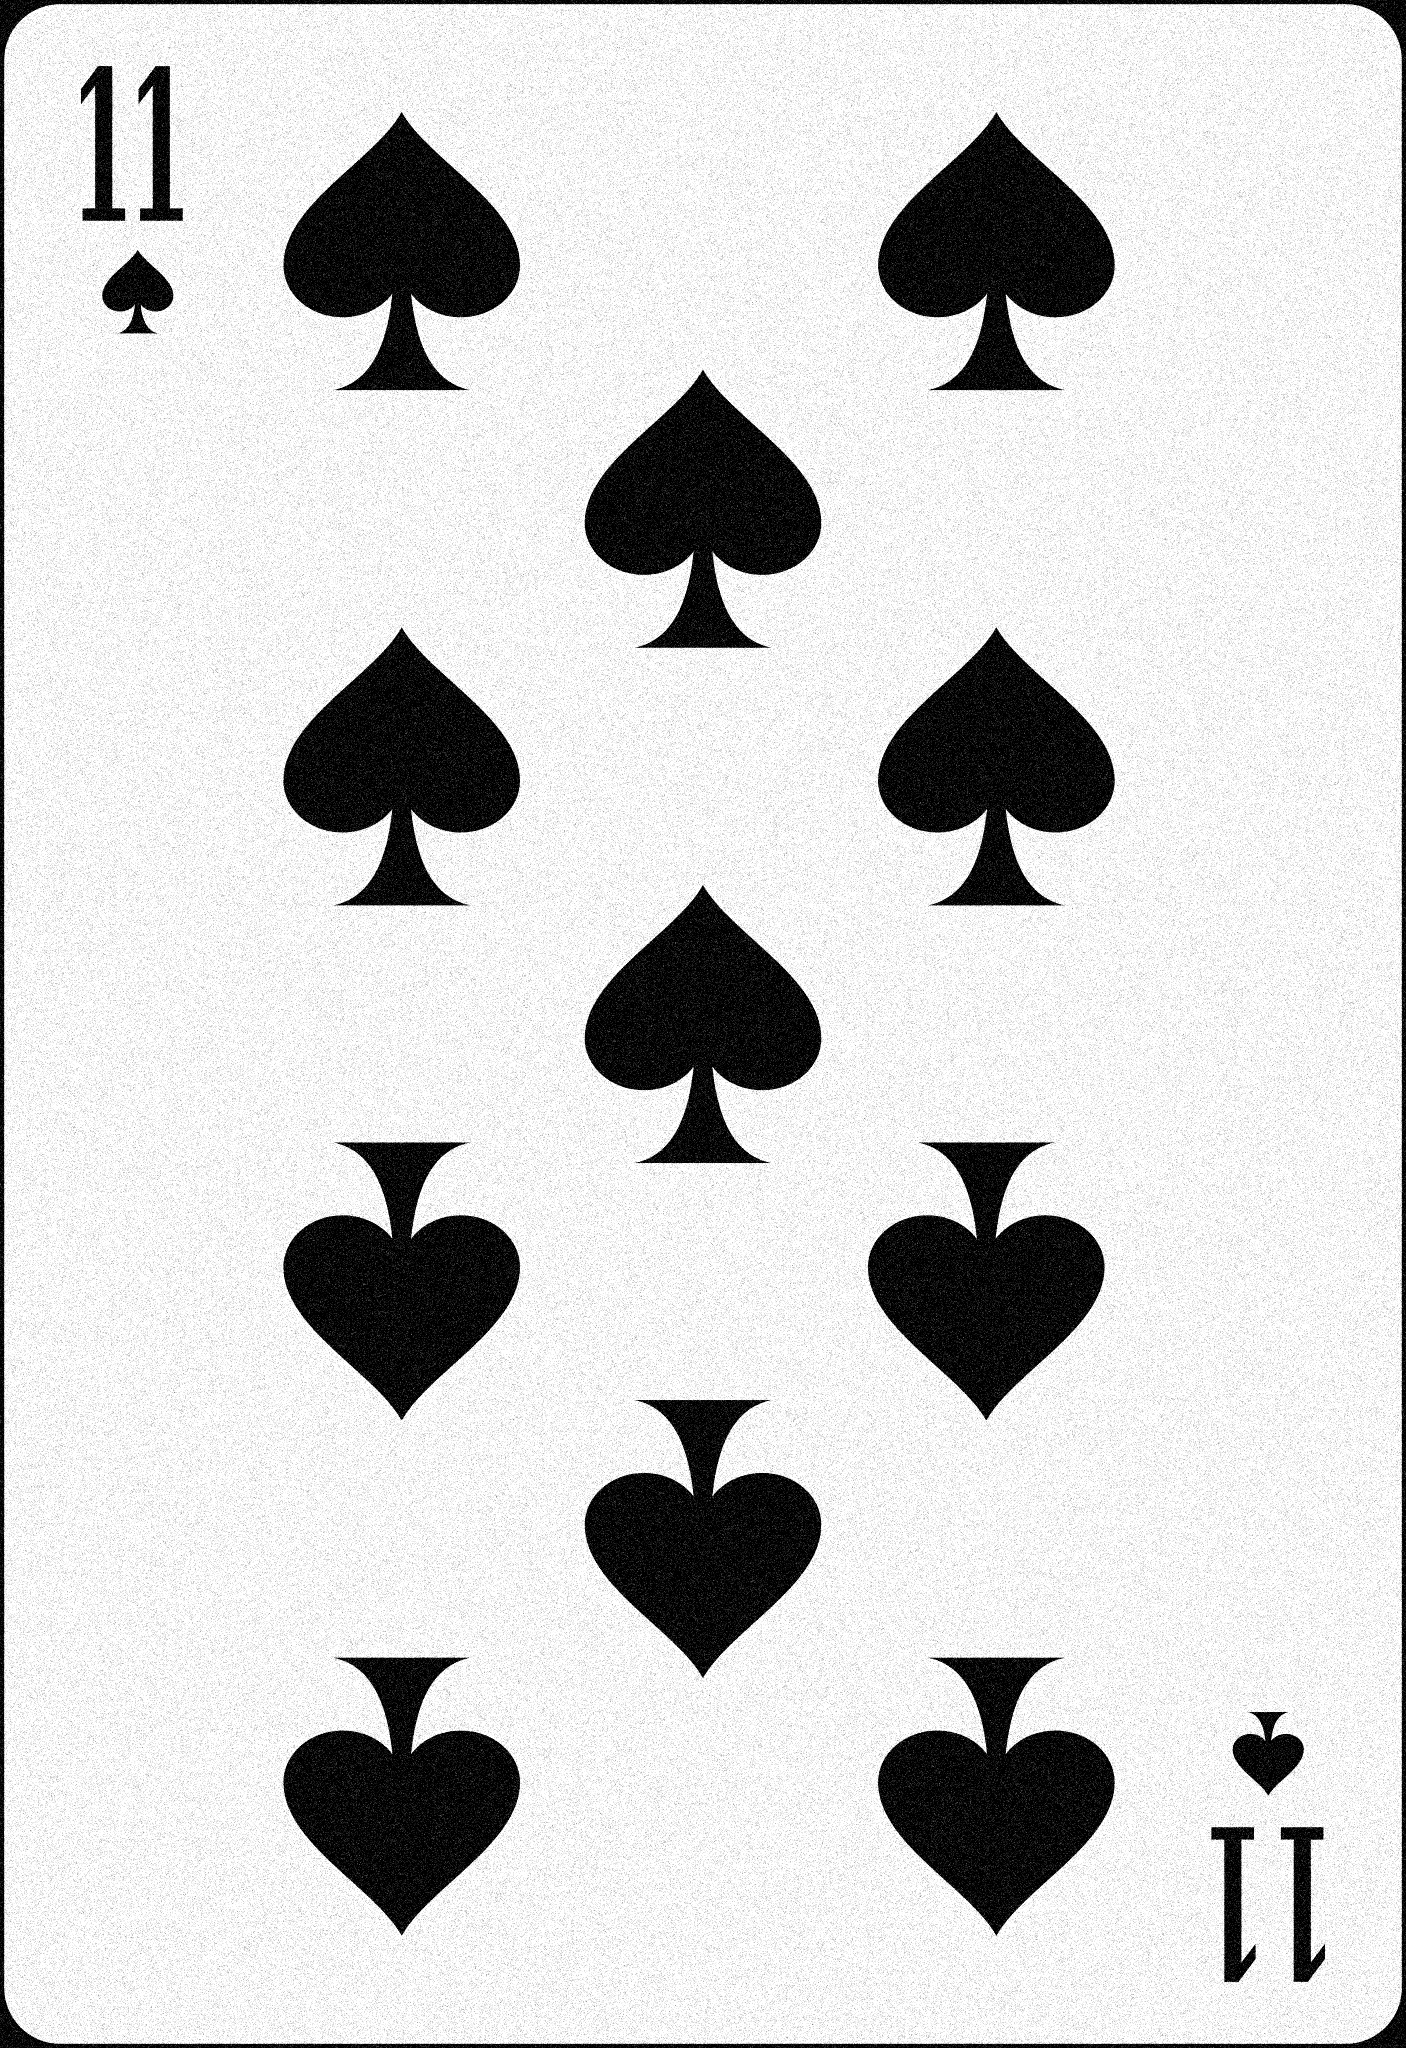

In [ ]:
from PIL import Image
import numpy as np
from skimage.util import random_noise

im = Image.open("/content/spades11.png") #insert image path.
# convert PIL Image to ndarray
im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image
noise_img = random_noise(im_arr, mode='gaussian', var=0.1**2)
noise_img = (255*noise_img).astype(np.uint8)

img = Image.fromarray(noise_img)
img.save("/content/noise_shape.png")
img.show()

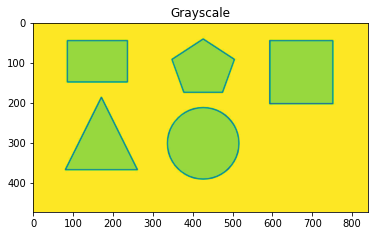

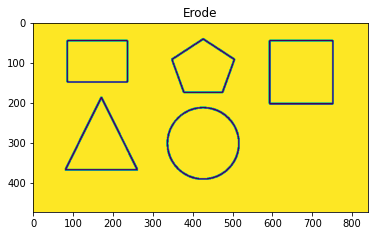

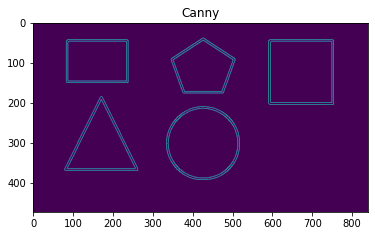

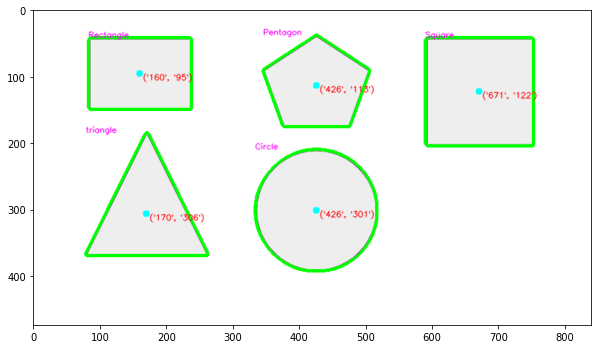

In [ ]:
# Load image
img = cv2.imread('/content/shapes.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = cv2.Laplacian(gray, cv2.CV_64F)
#gray22 = cv2.medianBlur(gray,9)
#gray22 = cv2.GaussianBlur(gray,(11,11),0)
#ret,gray22 = cv2.threshold(gray,180,255,cv2.THRESH_BINARY)
gray = cv2.blur(gray,(3,3))

# Threshold image
plt.imshow(gray)
plt.title("Grayscale")
plt.show()

ret, thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ((3,3)))
opening = cv2.erode(thresh, rect_kernel, iterations = 1)\
plt.imshow(opening)
plt.title("Erode")
plt.show()\
gray222 = cv2.Canny(opening, 50, 200)

# Find contours
plt.imshow(gray222)
plt.title("Canny")
plt.show()


contours, hierarchy = cv2.findContours(gray222, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
# Get moments and centroid of contour
for ct in contours:
  epsilon = 0.03 * cv2.arcLength(ct, True)
  approx = cv2.approxPolyDP(ct, epsilon, True)
  x, y, w, h = cv2.boundingRect(ct)
  M = cv2.moments(ct)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  font = cv2.FONT_HERSHEY_SIMPLEX
  ctr_pnt = (str(cx),str(cy))
  # Draw center point
  img = cv2.putText(img, str(ctr_pnt), (cx+5,cy+10), font, 
                    0.4, (255,0,0), 1, cv2.LINE_AA)
  if len(approx) == 2:
    shape = "love"                
  elif len(approx) == 3:
      shape = "triangle"
  elif len(approx) == 4:
      if 0.95 < w / h < 1.05:
          shape = "Square"
      else:
          shape = "Rectangle"
  elif len(approx) == 5:
      shape = "Pentagon"
  else:
      shape = "Circle"
  cv2.putText(img, shape, (x, y), font, 0.4, (255, 0, 255), 1, cv2.LINE_AA)
  cv2.circle(img, (cx, cy), 5, (0, 255, 255), -1)

# Display image
plt.figure(figsize = (10,10))
plt.imshow(img)

plt.show()

### Template Matching

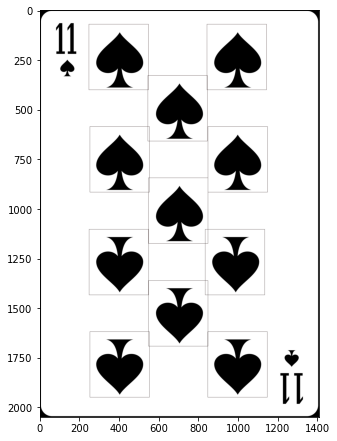

In [ ]:
img_rgb = cv2.imread('/content/spades11.png')  #insert image path
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/spadesA.jpg') #insert template image path
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(template,(300,300))
height, width = template.shape[::1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.4 #For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  
count = 0;
mask = np.zeros(img_rgb.shape[:2], np.uint8)
for pt in zip(*loc[::-1]):

  if mask[pt[1] + int(round(height/2)), pt[0] + int(round(width/2))] != 150:
      mask[pt[1]:pt[1]+height, pt[0]:pt[0]+width] = 150
      count += 1

      cv2.rectangle(img_rgb, (pt[0],pt[1]+ 40), (pt[0] + width, pt[1] +70+ height ), (25, count, count), thickness = 1)
plt.figure(figsize = (5,10))
plt.imshow(img_rgb)
plt.show()

# Report 4

Invert


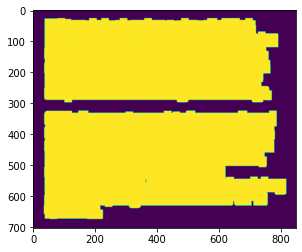

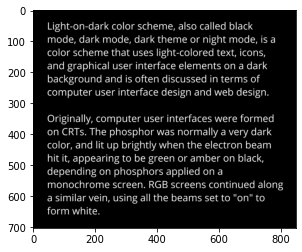

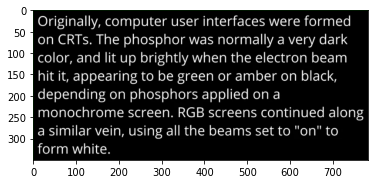

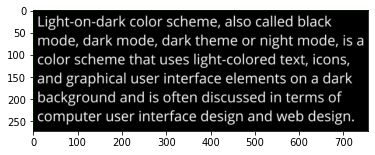

4
3
2
1


<function TextIOWrapper.close()>

In [ ]:
#@title Report 4 – Analyze the OCR (Optical Character Recognition)
img_Path = "/content/img2.png" #@param {type:"string"}
TextOut_Path = "output.txt" #@param {type:"string"}
# Import required packages

# Mention the installed location of Tesseract-OCR in your system
#pytesseract.pytesseract.tesseract_cmd = 'System_path_to_tesseract.exe'

# Read image from which text needs to be extracted=
img = cv2.imread(img_Path)

img2list = img.tolist()

#INVERT the image
total255 = 0
total0 = 0
for x in img2list[0]:
  total0 = total0 + (x.count(0))
  total255 = total255 + (x.count(255))

if total0 > total255:
  print("Invert")
  img2 = 255-img
else:
  print("Normal")
  img2=img
# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# of the rectangle to be detected.
# if no apply each word instead of a sentence.

#kernel size for dilation
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(thresh1.shape[0]/30), 
                                                         int(thresh1.shape[1]/30)))
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
												cv2.CHAIN_APPROX_NONE)
plt.imshow(dilation)
plt.show()
# Creating a copy of image
im2 = img.copy()
plt.imshow(im2)
plt.show()
# A text file is created and flushed
file = open(TextOut_Path, "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
to_print = []
y_all = []
to_print.append('')
to_print.append('')
for cnt in range(len(contours)):
  x, y, w, h = cv2.boundingRect(contours[cnt])
  y_all.append(y)
  # Drawing a rectangle on copied image
  rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 1)
  #plt.imshow(im2)
  plt.show()
  # Cropping the text block for giving input to OCR
  cropped = im2[y:y + h, x:x + w]
  plt.imshow(cropped)
  plt.show()
  text = pytesseract.image_to_string(cropped)
  to_print.append(text)
  # Open the file in append mode
to_print.append('')

# Appending the text into file
for text2print in range(len(to_print)-1,0,-1):
  file = open(TextOut_Path, "a")
  print(text2print)
  file.write(to_print[text2print])
  file.write("\n")

  # Close the file
file.close



In [ ]:
IMAGE_PATH = '/content/img1.jpg'

reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH,paragraph="True")
file = open('Text.txt', "w")

# Appending the text into file

#file.write(str(result))   ##### UNCOMMENT THIS and COMMENT the whole for loop if nothing is printed.
#file.write("\n")

for rst in range(len(result)):
  file.write(str(result[rst][1]))
  file.write("\n")

# Close the file
file.close
print(result)

[[[[13, 12], [644, 12], [644, 197], [13, 197]], 'Optical Character Recognition (OCR) is the process of recognizing text image and converting Into editable text. Most OCR are performed using deep  learning nowadays However; conventional method is still possible to perform quite decent performance_ Although the result will not be as good as the deep learning method; they are basic and easy to apply and use no data and training needed to perform simple OCR [hhile these methods may not be as accurate as decp learning-based OCR methods; they can still be effective in certain scenarios; such as when dealing with simpler fonts Or when computational resources are limited_'], [[[13, 255], [84, 255], [84, 279], [13, 279]], 'Objective'], [[[13, 321], [641, 321], [641, 370], [13, 370]], 'Objective of this task is to analyze and perform OCR_ Learn the theory behind and methods to perform OCR']]
